In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
#
# All CSVs created from Scala MLib PCA algorithm, CA 
#
m_file_prefixes= ['/var/tmp/transform_results/total_flow_transformed']
fid= "transform"

# Scatter

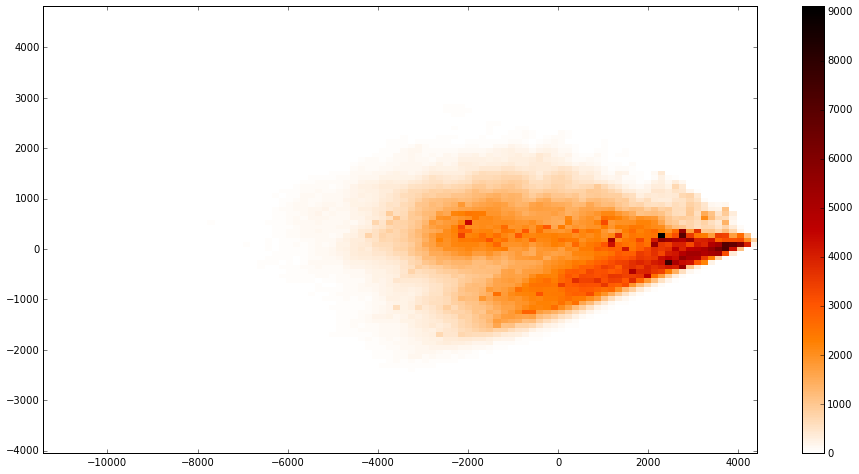

In [4]:
for p in m_file_prefixes:
    s= '.'
    m_filename= s.join([p, fid, 'csv'])
    m_df= pd.read_csv(m_filename, header=None)

    # scatter plot
    # fig, ax= plt.subplots(figsize=(16,8))
    # ax.scatter(m_df[0], m_df[1])
    plt.figure(figsize=(16,8))
    plt.hist2d(m_df[0], m_df[1], bins=100, cmap='gist_heat_r')
    plt.colorbar()
    #
    m_output_filename= p + '.pdf'
    plt.savefig(m_output_filename)

In [5]:
# for p in m_file_prefixes:
#     s= '.'
#     m_filename= s.join([p, fid, 'csv'])
#     m_df= pd.read_csv(m_filename, header=None)

#     # scatter plot
#     # fig, ax= plt.subplots(figsize=(16,8))
#     # ax.scatter(m_df[0], m_df[1])
#     plt.figure(figsize=(16,8))
#     plt.scatter(m_df[0], m_df[1])
#     #
#     m_output_filename= p + '_scatterplot.pdf'
#     plt.savefig(m_output_filename)

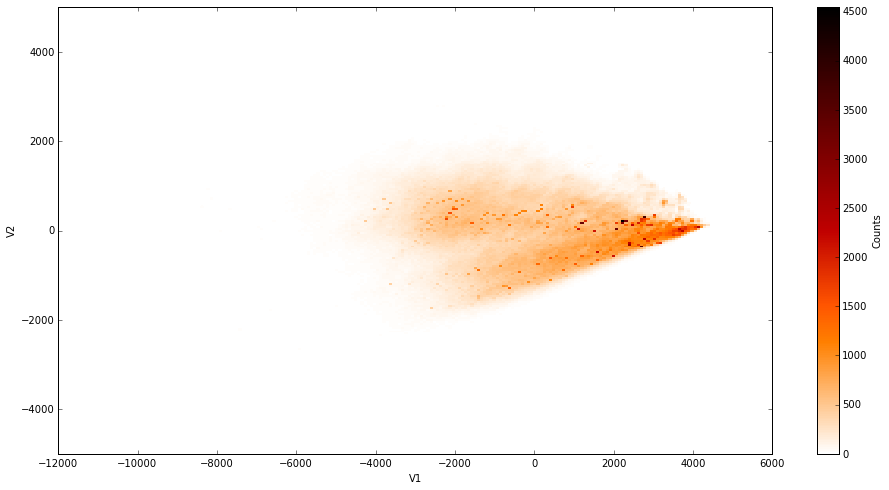

In [8]:
for p in m_file_prefixes:
    s= '.'
    m_filename= s.join([p, fid, 'csv'])
    m_df= pd.read_csv(m_filename, header=None)
    
    x= m_df[0]
    y= m_df[1]
    nbins = 200
    
    H, xedges, yedges = np.histogram2d(x,y,bins=nbins)

    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)

    # Mask zeros
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

    # Plot 2D histogram using pcolor
    fig2 = plt.figure(figsize=(16,8))
    plt.pcolormesh(xedges,yedges,Hmasked, cmap='gist_heat_r')
    plt.xlabel('V1')
    plt.ylabel('V2')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Counts')

    #
    m_output_filename= p + '_test.pdf'
    plt.savefig(m_output_filename)